# Homework 1 - Principal Component Analysis

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import normalize, PCA, MDS
from scipy.spatial import distance_matrix

In [2]:
#DATA READING AND NORMALIZATION

dataframe = np.genfromtxt("data/Frogs_MFCCs.csv", delimiter=',', dtype='object', skip_header=1)
data = normalize(np.array(dataframe[:,:-4], dtype='float'))
families=dataframe[:,-4].astype('U13')

In [3]:
#PCA

Y, eigenvalues, _=PCA(data, 2)

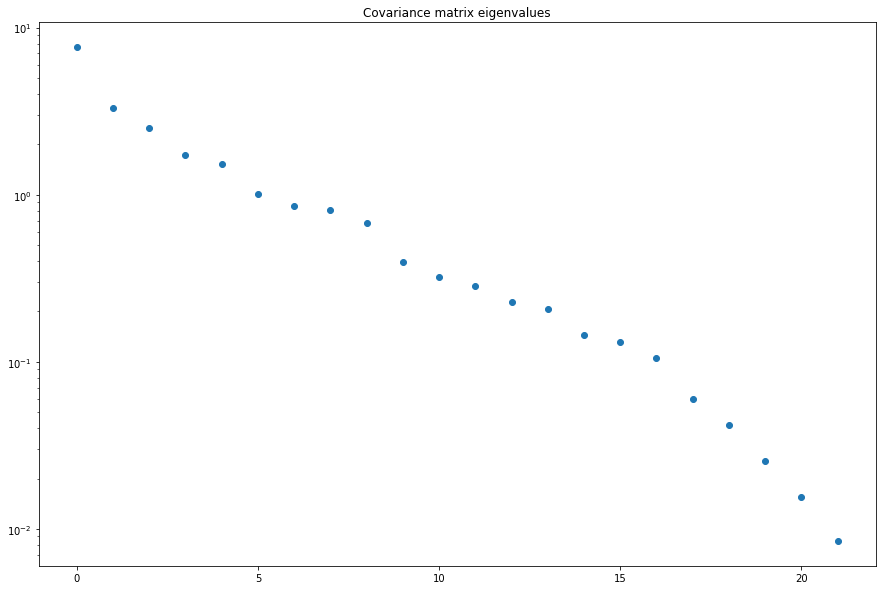

In [4]:
plt.figure(figsize=(15,10))
plt.title("Covariance matrix eigenvalues")
plt.semilogy(eigenvalues, 'o')

<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

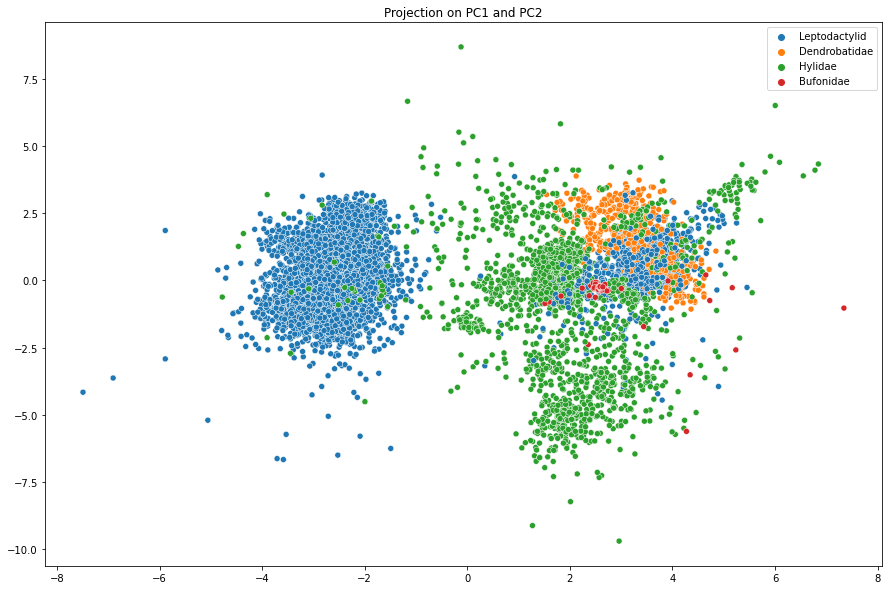

In [5]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=families)

In [14]:
#DISTANCE MATRIX COMPUTATION

dist=distance_matrix(data, data, p=2)**2

In [15]:
#PCA THROUGH MDS

y, eigvals=MDS(dist, 2)

/Users/lorenzo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

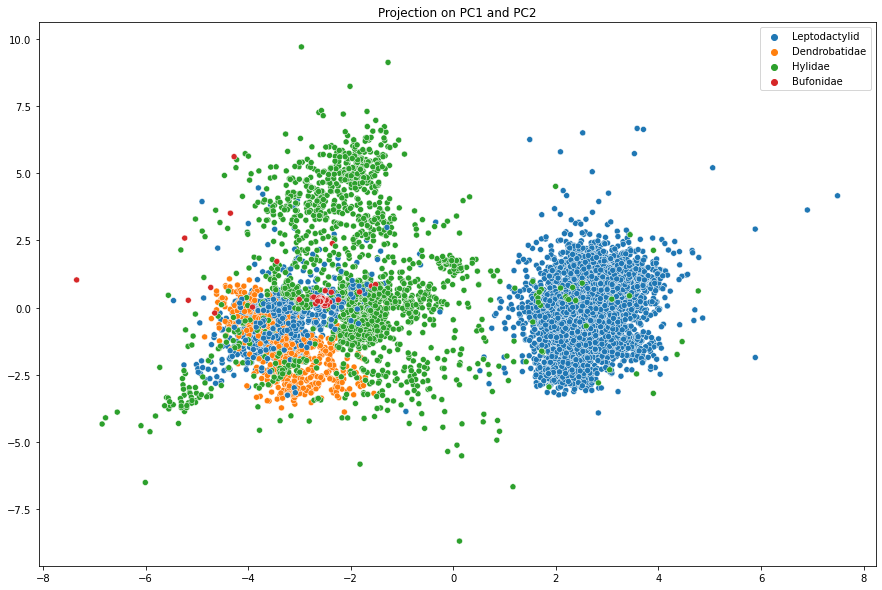

In [16]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=y[:,0], y=y[:,1], hue=families)